In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as wb

In [2]:

apple_close=pd.read_csv('AAPL_CLOSE',index_col='Date',parse_dates=True)
amazon_close=pd.read_csv('AMZN_CLOSE',index_col='Date',parse_dates=True)
ibm_close=pd.read_csv('IBM_CLOSE',index_col='Date',parse_dates=True)
cisco_close=pd.read_csv('CISCO_CLOSE',index_col='Date',parse_dates=True)

In [3]:
stocks=pd.concat([apple_close,amazon_close,ibm_close,cisco_close],axis=1)
stocks.columns=['apple_close','amazon_close','ibm_close','cisco_close']
stocks.head()

,apple_close,amazon_close,ibm_close,cisco_close
Date,,,,
2012-01-03,53.063218,179.03,160.830881,15.752778
2012-01-04,53.348386,177.51,160.174781,16.057180
2012-01-05,53.940658,177.61,159.415086,15.997991
2012-01-06,54.504543,182.61,157.584912,15.938801
2012-01-09,54.418089,178.56,156.764786,16.040268


In [4]:
stocks.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
apple_close,1258.0,88.500637,21.050096,51.135441,70.479587,89.544408,107.346693,127.446743
amazon_close,1258.0,406.004230,182.712524,175.930000,266.627500,333.060000,534.012500,844.360000
ibm_close,1258.0,159.677827,15.616340,112.696469,148.380286,163.535701,171.240460,190.252925
cisco_close,1258.0,22.239860,4.563858,12.894101,18.297083,22.319890,26.121773,30.870306


In [5]:
returns=stocks.pct_change(1)
returns.head()

,apple_close,amazon_close,ibm_close,cisco_close
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005374,-0.008490,-0.004079,0.019324
2012-01-05,0.011102,0.000563,-0.004743,-0.003686
2012-01-06,0.010454,0.028152,-0.011481,-0.003700
2012-01-09,-0.001586,-0.022178,-0.005204,0.006366


In [6]:
returns.tail()

,apple_close,amazon_close,ibm_close,cisco_close
Date,,,,
2016-12-23,0.001978,-0.007503,-0.002095,0.002298
2016-12-27,0.006351,0.014213,0.002579,0.004913
2016-12-28,-0.004264,0.000946,-0.005684,-0.008475
2016-12-29,-0.000257,-0.009040,0.002467,0.001315
2016-12-30,-0.007796,-0.019970,-0.003661,-0.007879


In [7]:
returns.mean()*250


apple_close     0.187442
amazon_close    0.332073
ibm_close       0.020148
cisco_close     0.149815
dtype: float64

In [8]:
returns.cov()*250

,apple_close,amazon_close,ibm_close,cisco_close
apple_close,0.067522,0.018865,0.014369,0.017744
amazon_close,0.018865,0.095045,0.014812,0.019831
ibm_close,0.014369,0.014812,0.034547,0.017848
cisco_close,0.017744,0.019831,0.017848,0.051129


In [9]:
returns.corr()

,apple_close,amazon_close,ibm_close,cisco_close
apple_close,1.000000,0.235487,0.297498,0.301990
amazon_close,0.235487,1.000000,0.258492,0.284470
ibm_close,0.297498,0.258492,1.000000,0.424672
cisco_close,0.301990,0.284470,0.424672,1.000000


In [10]:
log_returns=np.log(stocks/stocks.shift(1))#log can't deal percentage change
log_returns.head()

,apple_close,amazon_close,ibm_close,cisco_close
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005360,-0.008526,-0.004088,0.019139
2012-01-05,0.011041,0.000563,-0.004754,-0.003693
2012-01-06,0.010400,0.027763,-0.011547,-0.003707
2012-01-09,-0.001587,-0.022428,-0.005218,0.006346


In [11]:
log_returns.head()

,apple_close,amazon_close,ibm_close,cisco_close
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005360,-0.008526,-0.004088,0.019139
2012-01-05,0.011041,0.000563,-0.004754,-0.003693
2012-01-06,0.010400,0.027763,-0.011547,-0.003707
2012-01-09,-0.001587,-0.022428,-0.005218,0.006346


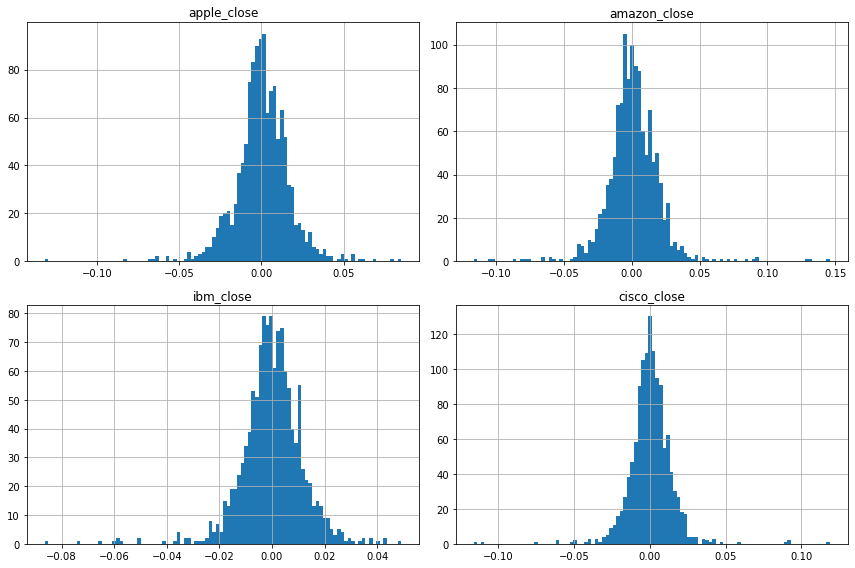

In [12]:
log_returns.hist(bins=100,figsize=(12,8))
plt.tight_layout()

In [13]:
weights=np.random.random(4)
weights/=np.sum(weights)

In [14]:
np.sum(weights)

1.0

In [15]:
np.random.seed(101)
return_portf=[]
volat_portf=[]
w1=[]
w2=[]
w3=[]
w4=[]
sharpe_ratio=[]
for i in range(5000):
    weights=np.random.random(4)
    weights/=np.sum(weights)
    w1.append(weights[0])
    w2.append(weights[1])
    w3.append(weights[2])
    w4.append(weights[3])
    ret=np.sum((log_returns.mean()*weights)*250)
    vol=np.sqrt(np.dot(weights.T,np.dot(log_returns.cov()*250,weights)))
    return_portf.append(ret)
    volat_portf.append(vol)
    sharpe_ratio.append(ret/vol)

In [16]:
sharpe_ratio=np.array(sharpe_ratio)
return_portf=np.array(return_portf)
volat_portf=np.array(volat_portf)
w1=np.array(w1)
w2=np.array(w2)
w3=np.array(w3)
w4=np.array(w4)

In [17]:
sharpe_ratio.argmax()

1583

In [18]:
sharpe_ratio[1583]

1.022369870063473

In [19]:
volat_portf[1583]

0.21388585062109078

In [20]:
w1[1583],w2[1583],w3[1583],w4[1583]

(0.28594793438985255,
 0.5429749824067808,
 0.009773354290652238,
 0.16130372891271444)

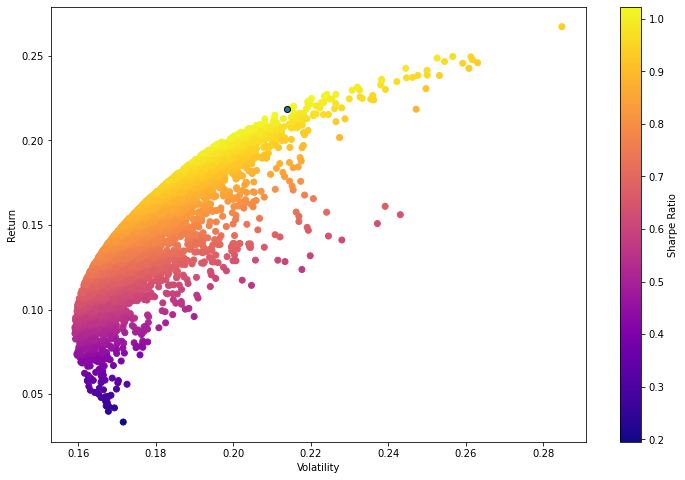

In [21]:
plt.figure(figsize=(12,8))
plt.scatter(volat_portf,return_portf,c=sharpe_ratio,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

plt.scatter(volat_portf[1583],return_portf[1583],cmap='red',edgecolors='black')